# Predicting Covid

### Problem Def :
> Predicting someone is covid positive or not ?

## Features
   * Country
   * Age
   * Gender
   * fever
   * Bodypain
   * Runny_nose
   * Difficulty_in_breathing
   * Nasal_congestion
   * Sore_throat
   * Severity
   * Contact_with_covid_patient
   * Infected
       

In [1]:
%matplotlib inline

# import all the basic modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# import visualising libraries
import seaborn as sns

# import the models
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# import hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

# import evaluation metrics
from sklearn.metrics import confusion_matrix , classification_report , precision_score , f1_score , recall_score
from sklearn.metrics import plot_roc_curve ,accuracy_score


In [2]:
df = pd.read_csv('covidreports.csv')
df.head()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,China,10,Male,102,1,0,0,0,1,Mild,No,0
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,Iran,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1


In [3]:
df.columns

Index(['Country', 'Age', 'Gender', 'fever', 'Bodypain', 'Runny_nose',
       'Difficulty_in_breathing', 'Nasal_congestion', 'Sore_throat',
       'Severity', 'Contact_with_covid_patient', 'Infected'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     2499 non-null   object
 1   Age                         2499 non-null   int64 
 2   Gender                      2499 non-null   object
 3   fever                       2499 non-null   int64 
 4   Bodypain                    2499 non-null   int64 
 5   Runny_nose                  2499 non-null   int64 
 6   Difficulty_in_breathing     2499 non-null   int64 
 7   Nasal_congestion            2499 non-null   int64 
 8   Sore_throat                 2499 non-null   int64 
 9   Severity                    2499 non-null   object
 10  Contact_with_covid_patient  2499 non-null   object
 11  Infected                    2499 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 234.4+ KB


In [5]:
df.describe()

,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Infected
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
mean,43.573429,100.585834,0.652261,0.294518,0.484194,0.470188,0.509804,0.504202
std,17.379751,1.711163,0.476348,0.455917,0.499850,0.499210,0.500004,0.500082
min,10.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,100.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,55.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,89.000000,104.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

Country                       0
Age                           0
Gender                        0
fever                         0
Bodypain                      0
Runny_nose                    0
Difficulty_in_breathing       0
Nasal_congestion              0
Sore_throat                   0
Severity                      0
Contact_with_covid_patient    0
Infected                      0
dtype: int64

In [7]:
df_copy = df

## EDA and Visualization

In [8]:
df_copy['Infected'].value_counts()

1    1260
0    1239
Name: Infected, dtype: int64

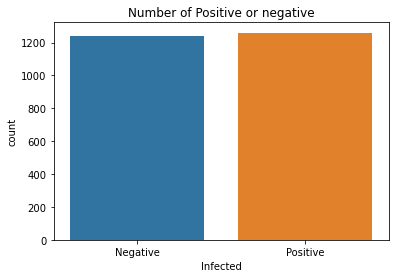

In [9]:
sns.countplot(x = 'Infected' ,  data = df_copy)
plt.title('Number of Positive or negative')
plt.xticks([0,1],['Negative' , 'Positive']);

* This shows that we have almost a even number of negative and positive value

In [10]:
df_copy['Gender'].value_counts()

Male           1257
Female         1208
Transgender      34
Name: Gender, dtype: int64

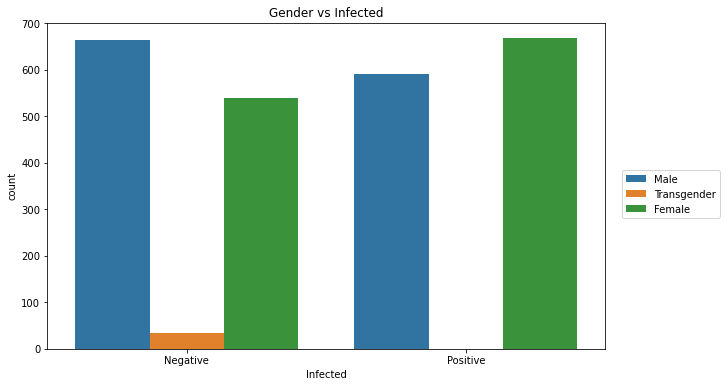

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Infected' ,  data = df_copy , hue= df_copy['Gender'])
plt.title('Gender vs Infected')
plt.xticks([0,1],['Negative' , 'Positive'])
plt.legend(loc=(1.03,0.4));

In [12]:
df_copy['Difficulty_in_breathing'].value_counts()

0    1289
1    1210
Name: Difficulty_in_breathing, dtype: int64

In [13]:
df_copy['Severity'].value_counts()

Mild        1591
Moderate     525
Severe       383
Name: Severity, dtype: int64

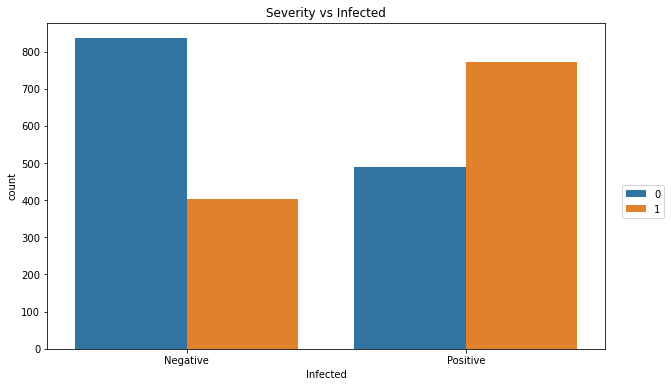

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Infected' ,  data = df_copy , hue= df_copy['Nasal_congestion'])
plt.title('Severity vs Infected')
plt.xticks([0,1],['Negative' , 'Positive'])
plt.legend(loc=(1.03,0.4));

* People with nasal congestion is more likely to be covid positive 

In [15]:
df_copy['Contact_with_covid_patient'].value_counts()

No           1203
Yes           638
Not known     633
yes            25
Name: Contact_with_covid_patient, dtype: int64

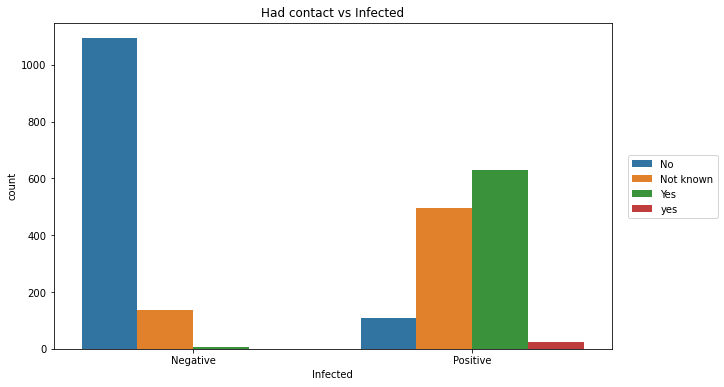

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Infected' ,  data = df_copy , hue= df_copy['Contact_with_covid_patient'])
plt.title('Had contact vs Infected')
plt.xticks([0,1],['Negative' , 'Positive'])
plt.legend(loc=(1.03,0.4));

* From the above graph we can see people with interaction with a covid positive person is more likely to have covid 

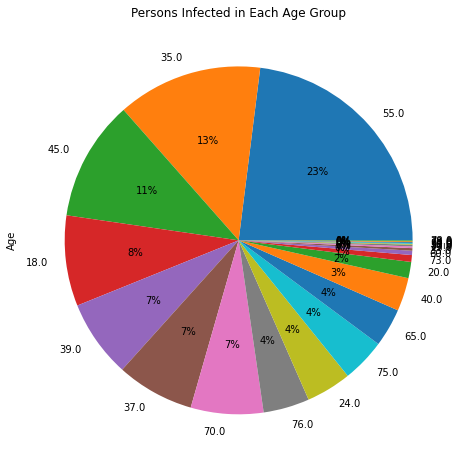

In [17]:
x = df_copy['Age'].where(df_copy['Infected'] == 1).value_counts()
plt.figure(figsize=(8,8))
x.plot.pie(autopct='%.0f%%')
plt.title('Persons Infected in Each Age Group');

* As we can see most infected people are between the age group of 45 to 55 also we can say elderly persons are more prone to getting Infected

In [18]:
# total Number of Participants
df_copy['Country'].value_counts()

France         115
Bulgaria        92
China           83
Singapore       71
Vietnam         69
              ... 
Monaco           2
Israel           2
Austria          2
Czechia          2
Switzerland      2
Name: Country, Length: 97, dtype: int64

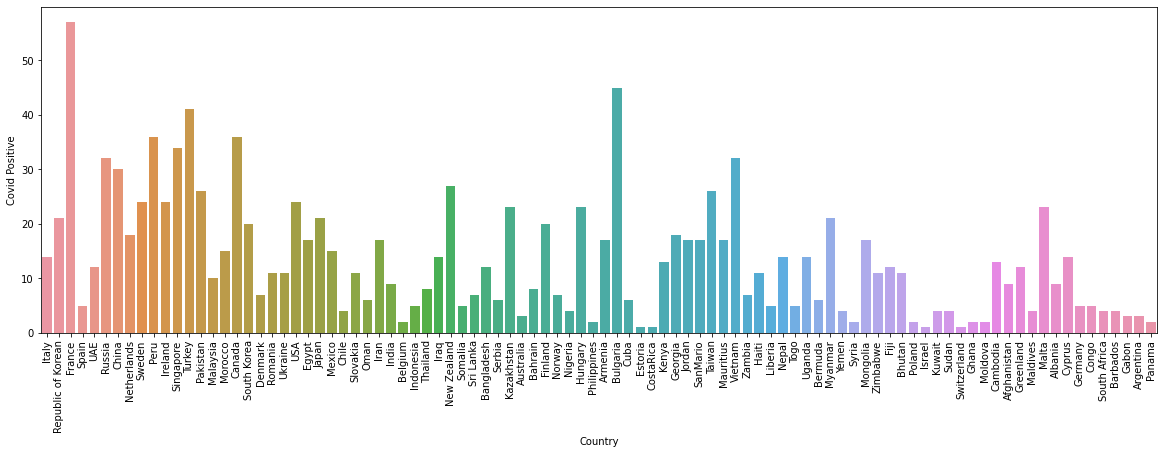

In [19]:
a = df_copy['Country'].where(df_copy['Infected']==1)
plt.figure(figsize=(20,6))
sns.countplot(x = a)
plt.xticks(rotation=90)
plt.ylabel('Covid Positive');

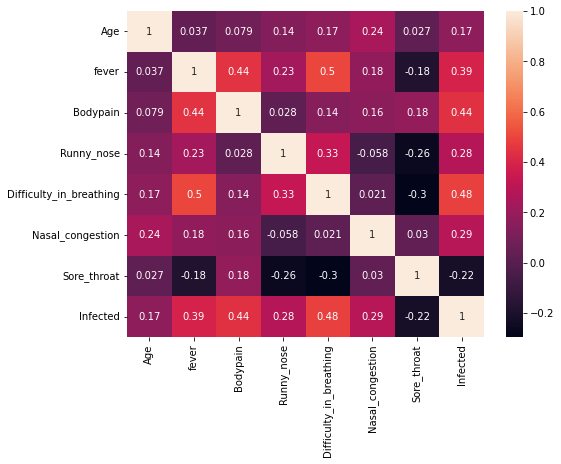

In [20]:
plt.figure(figsize = (8,6))
sns.heatmap(df_copy.corr() , annot=True);

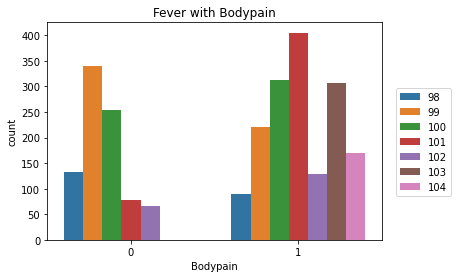

In [21]:
sns.countplot(x = df_copy['Bodypain'] , hue = df_copy['fever'] , data = df_copy )
plt.title('Fever with Bodypain')
plt.legend(loc = (1.04,0.2));

### Converting object to int

In [22]:
df_main = pd.get_dummies(df_copy , columns=['Gender' ,'Severity' , 'Contact_with_covid_patient'])
df_main.drop('Country' , inplace = True , axis = 1)

In [23]:
df_main.head()

,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Infected,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_Severe,Contact_with_covid_patient_No,Contact_with_covid_patient_Not known,Contact_with_covid_patient_Yes,Contact_with_covid_patient_yes
0,10,102,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
1,20,103,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
2,55,99,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0
3,37,100,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0
4,45,101,1,1,1,1,0,1,0,1,0,0,1,0,0,0,1,0


In [24]:
df_main.shape

(2499, 18)

In [25]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Age                                   2499 non-null   int64
 1   fever                                 2499 non-null   int64
 2   Bodypain                              2499 non-null   int64
 3   Runny_nose                            2499 non-null   int64
 4   Difficulty_in_breathing               2499 non-null   int64
 5   Nasal_congestion                      2499 non-null   int64
 6   Sore_throat                           2499 non-null   int64
 7   Infected                              2499 non-null   int64
 8   Gender_Female                         2499 non-null   uint8
 9   Gender_Male                           2499 non-null   uint8
 10  Gender_Transgender                    2499 non-null   uint8
 11  Severity_Mild                         2499 

## Modelling

In [26]:
# Creating the train set and test set
X = df_main.drop('Infected' , axis = 1)
y = df_main['Infected']

# Spliting the datasets for testing and training for evaluation 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1749, 17), (750, 17), (1749,), (750,))

In [28]:
# Models to test on
# Baseline scores

models = {'Logistic Regression' : LogisticRegression() , 
         'KNN' : KNeighborsClassifier() ,
         'Random Forests' : RandomForestClassifier() ,
         'Desicion Tree' : DecisionTreeClassifier()}

# Fitting and checkin score of models
def prep_models(models , X_train , X_test , y_train  , y_test):
    """
        fitting and testing different models 
        models = dict of the required models
    """
    
    # set the random seed
    np.random.seed(45)
    
    #scores dict 
    mod_scores = {}
    
    for name , model in models.items():
        model.fit(X_train , y_train) # fitting the model
        pred = model.predict(X_test)
        # evaluating and adding the scores to the dict
        mod_scores[name] = {'Precision' : precision_score(pred , y_test ) , 
                           'Recall' : recall_score(pred , y_test ) , 
                           'F1 Score' : f1_score(pred , y_test )  , 
                           'Accuracy' : accuracy_score(pred , y_test )}
    return mod_scores

In [29]:
%%time
model_scores = prep_models(models , 
                           X_train = X_train ,
                           X_test = X_test , 
                          y_train = y_train , 
                          y_test = y_test)
model_display = pd.DataFrame(model_scores)
model_display

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 3.45 s


,Logistic Regression,KNN,Random Forests,Desicion Tree
Precision,0.962779,0.935484,0.950372,0.950372
Recall,0.910798,0.912833,0.929612,0.929612
F1 Score,0.936068,0.924020,0.939877,0.939877
Accuracy,0.929333,0.917333,0.934667,0.934667


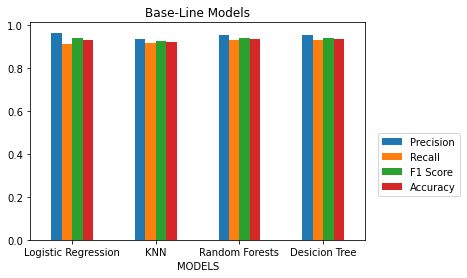

In [30]:
model_display.T.plot(kind = 'bar')
plt.title('Base-Line Models')
plt.legend(loc=(1.04 , 0.2))
plt.xlabel("MODELS")
plt.xticks(rotation = 0);

#### As the accuracy and precision of Logistic regression is higesht also desicion tree and random forest is almost same we will use hyper parameter tuning on 
* Random Forests 
* Logistic Regression 


### Hyper parameter tuning (Random Forests)

In [31]:
%%time
param_grid_rf = {'n_estimators' : np.arange(10 , 1000 , 50) , 
                'max_depth' : [None , 3 , 5 , 7 , 10] ,
                'min_samples_split' : np.arange(2,10,2) , 
                'min_samples_leaf' : np.arange(1,10,2)}

np.random.seed(42)
rs_log = GridSearchCV(RandomForestClassifier() , 
                           param_grid=param_grid_rf , 
                           cv = 5 , # cross validation 
                           verbose=True)
rs_log.fit(X_train,y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
Wall time: 2h 3min 58s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 7, 10],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [32]:
rs_log.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 110}

In [33]:
clf = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, 
                             min_samples_split = 2 , n_estimators = 110)
clf.fit(X_train , y_train)
clf.score(X_test,y_test)

0.9346666666666666

### Hyper parameter tuning (Logistic Regression)

In [34]:
%%time
param_grid_log = {'C' : np.logspace(-8,8,20) , 
             'solver' : ['liblinear' , 'lbfgs'] , 
                 'max_iter' : [500]}

np.random.seed(42)
grid_log = GridSearchCV(LogisticRegression() , 
                           param_grid = param_grid_log , 
                           cv = 10 , # cross validation 
                           verbose=True)
grid_log.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Wall time: 27.8 s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-08, 6.95192796e-08, 4.83293024e-07, 3.35981829e-06,
       2.33572147e-05, 1.62377674e-04, 1.12883789e-03, 7.84759970e-03,
       5.45559478e-02, 3.79269019e-01, 2.63665090e+00, 1.83298071e+01,
       1.27427499e+02, 8.85866790e+02, 6.15848211e+03, 4.28133240e+04,
       2.97635144e+05, 2.06913808e+06, 1.43844989e+07, 1.00000000e+08]),
                         'max_iter': [500], 'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [35]:
grid_log.best_params_

{'C': 18.329807108324374, 'max_iter': 500, 'solver': 'liblinear'}

In [36]:
clf = LogisticRegression(C = 18.329807108324374, max_iter = 500, solver = 'liblinear')
clf.fit(X_train , y_train)
clf.score(X_test,y_test)

0.9333333333333333

### Final Evaluation 
   * Final evaluation is on the Random Forest Classifier 
        * Accuracy = 94.6% 
   * where as Logistic Regression 
       * Accuracy = 93.3%

In [37]:
np.random.seed(45)
clf = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, 
                             min_samples_split = 2 , n_estimators = 110)
clf.fit(X_train , y_train)
pred = clf.predict(X_test)

In [38]:
print(confusion_matrix(pred , y_test))

[[318  20]
 [ 29 383]]


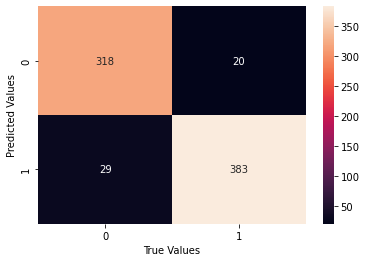

In [39]:
sns.heatmap(confusion_matrix(pred , y_test) , annot=True , fmt='g' )
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

In [40]:
print(classification_report(pred , y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       338
           1       0.95      0.93      0.94       412

    accuracy                           0.93       750
   macro avg       0.93      0.94      0.93       750
weighted avg       0.94      0.93      0.93       750



In [41]:
# cross validated precision , recall and F1 score

cv_acc = cross_val_score(clf , X , y , scoring='accuracy' , cv= 5)
print(f'accuracy = {np.mean(cv_acc)}')
cv_rec = cross_val_score(clf , X , y , scoring='recall' , cv= 5)
print(f'recall = {np.mean(cv_rec)}')
cv_pre = cross_val_score(clf , X , y , scoring='precision' , cv= 5)
print(f'precision = {np.mean(cv_pre)}')
cv_F1 = cross_val_score(clf , X , y , scoring='f1' , cv= 5)
print(f'F1_score = {np.mean(cv_F1)}')

accuracy = 0.9475783567134268
recall = 0.9531746031746031
precision = 0.9430917575526383
F1_score = 0.9470556035272221


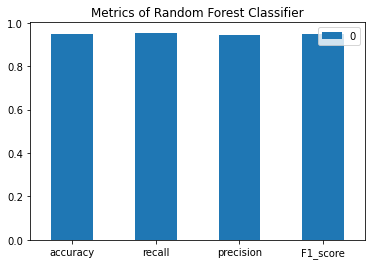

In [42]:
# graph of the metrics
metrics = pd.DataFrame({'accuracy' : 0.9475783567134268,
'recall' : 0.9531746031746031,
'precision' : 0.9430917575526383,
'F1_score' : 0.9470556035272221} , index=[0])

metrics.T.plot(kind = 'bar' , title = 'Metrics of Random Forest Classifier')
plt.xticks(rotation = 0);

### We found the best model to be Random Forest Classifier with an accuracy of 0.94 and recall of 0.95

In [43]:
import pickle
# save the model to disk
filename = 'finalized_model_Covid.pkl'
pickle.dump(clf, open(filename, 'wb'))